In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = web.DataReader('TSLA', data_source = 'yahoo', start = '2012-01-01', end = '2021-01-12')

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2021-01-06,774.000000,749.099976,758.489990,755.979980,44700000.0,755.979980
2021-01-07,816.989990,775.200012,777.630005,816.039978,51498900.0,816.039978
2021-01-08,884.489990,838.390015,856.000000,880.020020,74661000.0,880.020020


In [4]:
df.shape

(2272, 6)

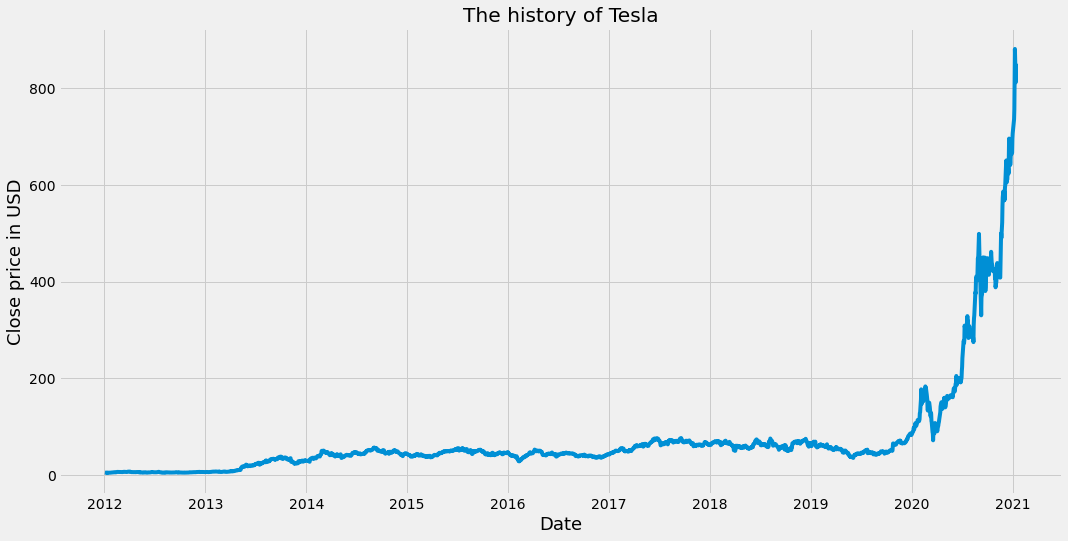

In [5]:
plt.figure(figsize =(16,8))
plt.title("The history of Tesla")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price in USD', fontsize = 18)
plt.show()

In [6]:
data = df.filter(['Close'])

In [7]:
dataset = data.values

In [8]:
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1818

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [10]:
train_data = scaled_data[0:training_data_len, :]

In [11]:
x_train = []
y_train = []

In [13]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.0012085 , 0.00112398, 0.00098919, 0.00094122, 0.00101889,
       0.00110342, 0.00124277, 0.00124734, 0.        , 0.0008704 ,
       0.00091837, 0.00090695, 0.0008704 , 0.00090923, 0.00105773,
       0.00118337, 0.00140497, 0.00149407, 0.0015489 , 0.00143467,
       0.00155118, 0.00170424, 0.00190985, 0.00205834, 0.00201265,
       0.00208804, 0.00223653, 0.00189843, 0.00198752, 0.00237132,
       0.00246955, 0.00260205, 0.00278253, 0.00267516, 0.00261119,
       0.00268201, 0.00250382, 0.00247412, 0.00251753, 0.00242615,
       0.0026546 , 0.00257007, 0.00250839, 0.00235761, 0.0023599 ,
       0.00234847, 0.00272999, 0.00302012, 0.0030384 , 0.00285564,
       0.00278938, 0.00286249, 0.00278481, 0.00278025, 0.00282365,
       0.00265231, 0.00257921, 0.00333767, 0.00346103, 0.00344047]), array([0.00112398, 0.00098919, 0.00094122, 0.00101889, 0.00110342,
       0.00124277, 0.00124734, 0.        , 0.0008704 , 0.00091837,
       0.00090695, 0.0008704 , 0.00090923, 0.00105773, 0.00

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [15]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

In [16]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dense(units = 25))
model.add(Dense(units =1))

In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3516/3516 [==============================] - 62s 17ms/step - loss: 7.1410e-05
Epoch 2/2
3516/3516 [==============================] - 60s 17ms/step - loss: 1.4426e-05


In [19]:
test_data = scaled_data[training_data_len -60: , : ]

In [20]:
x_test = []
y_test = dataset[training_data_len :, :]

In [21]:
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [22]:
x_test = np.array(x_test)


In [23]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [24]:
predictions = model.predict(x_test) 

In [25]:
predictions = scaler.inverse_transform(predictions)

In [26]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


58.793719046478856

In [27]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-27-8f78faa8f9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


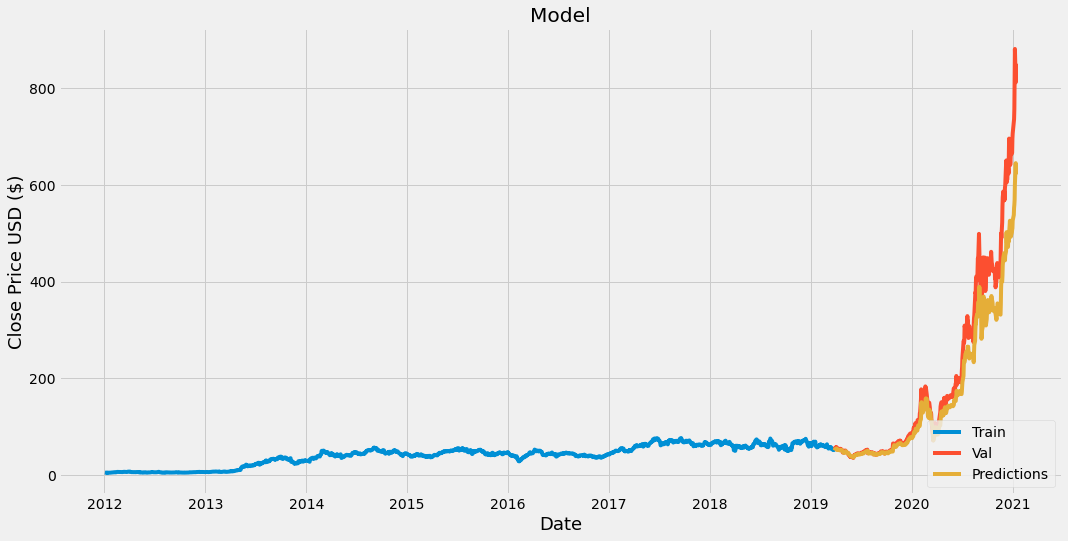

In [28]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [29]:
valid

,Close,Predictions
Date,,
2019-03-27,54.966000,51.277332
2019-03-28,55.723999,52.464912
2019-03-29,55.972000,53.415535
2019-04-01,57.835999,53.827244
2019-04-02,57.175999,54.925976
...,...,...
2021-01-06,755.979980,558.307983
2021-01-07,816.039978,568.600098
2021-01-08,880.020020,601.434326


In [30]:
tesla_quote = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end = '2021-01-12')

In [31]:
new_df1 = tesla_quote.filter(['Close'])

In [32]:
last_60_days = new_df1[-60:].values

In [33]:
last_60_days_scaled = scaler.transform(last_60_days)

In [34]:
X_test = []

In [35]:
X_test.append(last_60_days_scaled)

In [36]:
X_test = np.array(X_test)

In [37]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [38]:
pred_price = model.predict(X_test)

In [40]:
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[623.93884]]
